# Project using linear regression to predict Medical Expenses
This project consists of creating a system to estimate the annual medical expenditure for new patients using the following information:
* Age
* Sex
* BMI
* Children
* Smoking habits
* Region
* Residence

With this system, you will be able to determine the annual insurance premium offered to the customer.

# Importing the libraries required

In [1]:
import pandas as pd
import numpy as np


# For exploratory analysis and visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Bringing the data


In [2]:
data_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
medical_data = pd.read_csv(data_url)

In [3]:
medical_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


According to the dataset, it contains 1338 customer and 7 features about them.
We want to find a way to estimate the value in "charges" based on the other characteristics. We analyze the historical data, then we should able to estimate charges for new customers, by asking information like age, sex, BMI, number of children, smoking habits and region.

## Data type for each column:

In [4]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The features with numeric data type are: "age", "bmi", "children" and "charges". "Sex", "smoker" and "region" are strings. There no missing values.
## Statistics of numerical features:

In [5]:
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The data has reasonable values (all data is positive and within an acceptable range). A point to consider is that the charges in the 50% is much lower than the maximum value. The same thing happens for the number of children.

# Exploratory analysis and Visualization

Let's check the data by visualizing the distribution of of values and the relationship between our target feature and the other columns.

## Age
Age is a numeric column. The mean age is 39.207 years, the minimum age is 18 and the maximum age is 64. There are 47 different ages in the dataset, therefore we can visualize the distribution of this feature with a histogram with 47 bins and a box plot too. 

In [6]:
medical_data.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

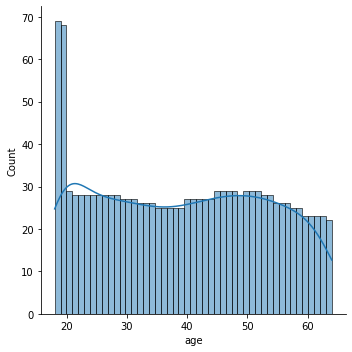

In [7]:
matplotlib.rcParams['figure.figsize'] = (20, 20)
sns.displot(data = medical_data.age, kde = True, bins = 47)
plt.show()

The distribution of ages is almost uniform, with an number of customers of approximately 30 per year, except before 20 which is close to 70. This tells us that there isn't a big variation in the number of people of any given age.

## Body Mass Index (BMI)
The distribution of BMI is the following:

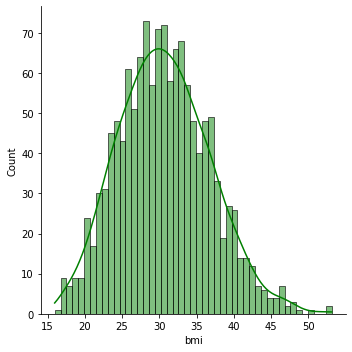

In [8]:
sns.displot(data = medical_data.bmi, kde = True, bins = 47, color = "green")
plt.show()

The distribution is seems Gaussian centered around the value 30, it has a few outliers towards the right.

BMI values can be interpreted as:

* < 18.5: underweight
* 18.5-24.9: normal-weight
* 25-29.9: overweight 
* 30-39.9: obesity
* $> 40$: morbid obesity


## Smoker
This feature contains the values "yes" and "no", so we are going to visualize the distribution using a histogram. We divide it by sex.

First, the number of smokers and non-smokers is 274 and 1064, respectively:

In [9]:
medical_data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

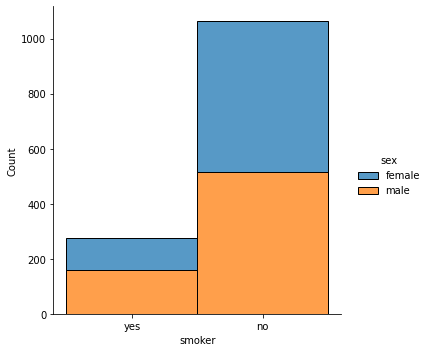

In [10]:
sns.displot(data = medical_data, x = "smoker", hue="sex", multiple="stack")
plt.show()

In [11]:
print("{:.3f}% of customers have reported that they smoke".format(274/(1064+274)*100))

20.478% of customers have reported that they smoke


## Sex
The number of men and women in the dataset is 676 and 662, respectively. Then, There are practically the same number of women as men.

In [12]:
medical_data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

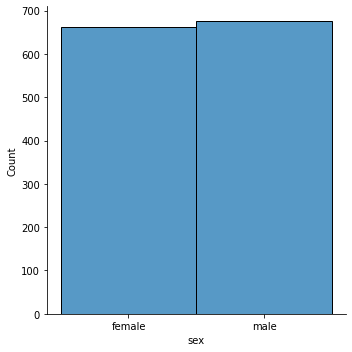

In [13]:
sns.displot(data=medical_data, x = "sex")
plt.show()

## Region
This characteristic has a uniform distribution with a value of 325 customers approximately. The southeast has the highest value with 364 customers.

In [14]:
medical_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

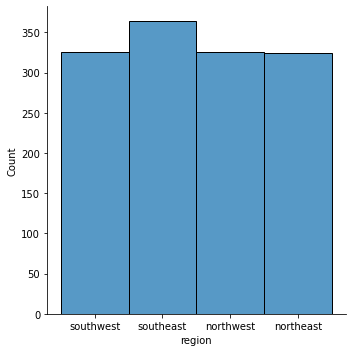

In [15]:
sns.displot(medical_data, x = "region")

## Children
The majority of customers do not have children (574), then the number decreases as the number of children increases. 324 customers have 1 child, 240 customers have 2 children, 157 have 3 children.

In [16]:
medical_data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

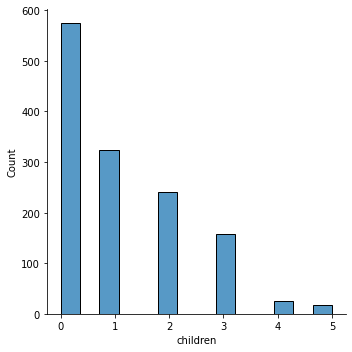

In [17]:
sns.displot(medical_data, x = "children")

## Charges 
This is the feature we are trying to predict. Let's visualize the distribution of "charges" and we also use the categorical columns to distinguish the charges with respect to the other characteristics.

### Charges vs smoker

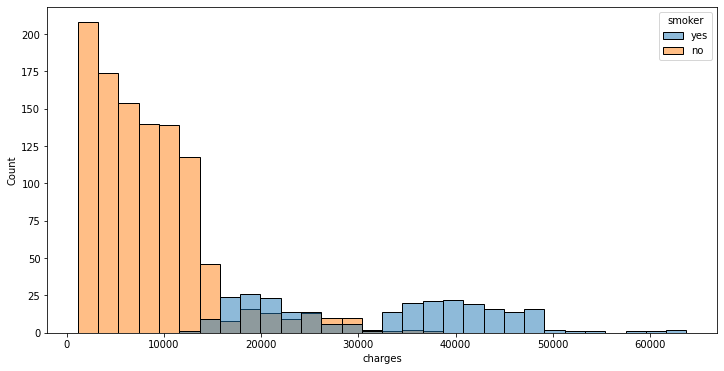

In [28]:
plt.figure(figsize =(12,6))
sns.histplot(data = medical_data, x = "charges", hue = "smoker")
plt.show()

Observations:
* The largest number of customers have a Annual medical charges of less than $10000. A small fraction of custumers have higher medical charges than that number. The distribution follows a "power law".
* Almost all non-smokers correspond to consumers with Annual medical charges less than $10000. Smokers have charges between $20000 and $50000.

### Charges vs sex


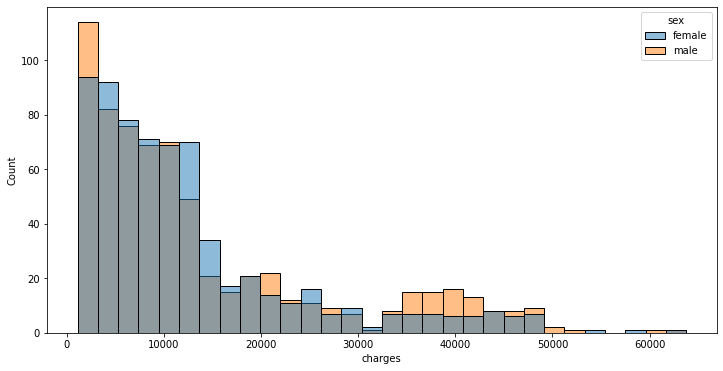

In [29]:
plt.figure(figsize =(12,6))
sns.histplot(data = medical_data, x = "charges", hue = "sex")
plt.show()

Observations:
* The distribution follows a "power law".
* Between men and women there is almost no difference in the charges they present. Only in charges between $30000 and $50000 is ther a small increase in the number of men.

### Charges and Age
Let's check the relationship between "charges" and "age" using a scatter plot. Each point represents one costumer. We use values in the "smoker" column to color the points.

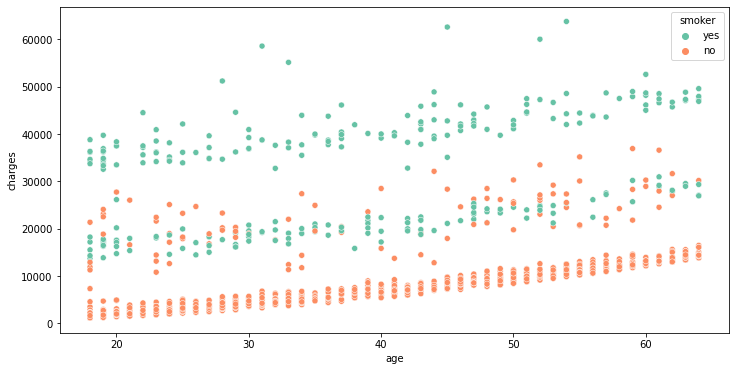

In [36]:
plt.figure(figsize =(12,6))
sns.scatterplot(data = medical_data, x = "age", y = "charges", hue = "smoker", palette="Set2")
plt.show()

Observations about the chart:
* As we might expect, there is a trend that looks like that medical charges increase with age, but at each age there is significant variation, therefore, the age is not a parameter that can be used alone to determine medical charges.
* There are three clusters of points with an increasing slope, these are:
    * The first and largest cluster cluster consists of non-smokers who have low medical charges in relation to the others (Orange).
    * The second cluster contains both smokers and non-smokers. These may actually be two distinct but overlapping clusters: "non-smokers with medical problems" and "smokers without major medical problems".
    * The third cluster consists of consists of smokers, these can be smokers with major medical issues related to smoking.

### Charges vs BMI
We use another scatter plot to visualise the relationship between BMI and charges. The "smoker" column is also used to color the points.

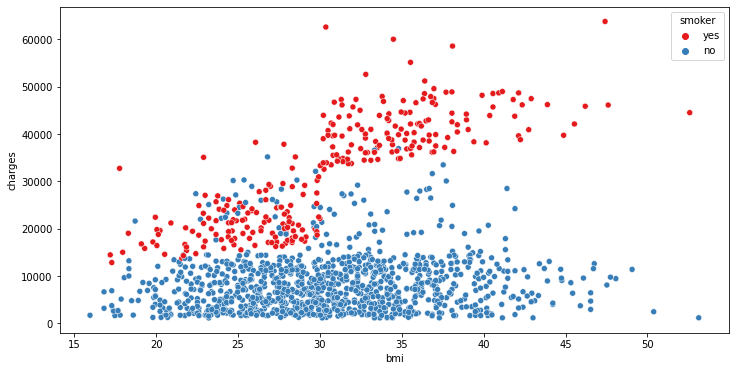

In [38]:
plt.figure(figsize =(12,6))
sns.scatterplot(data = medical_data, x = "bmi", y = "charges", hue = "smoker", palette="Set1")
plt.show()

It seems that for non-smokers there is no relationship with BMI; an increase in BMI does not seem to be related to an increase in medical charges. Nevertheless, medical charges seem to be significantly higher for smokers with a BMI greater than 30.

## Correlation
